In [1]:
import pandas
import numpy as np
import pandas as pd
from pandas import DataFrame

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering as Ag


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:

df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")
df.head()



,Unnamed: 0,AAGE,AANCSTR1,AANCSTR2,AAUGMENT,ABIRTHPL,ACITIZEN,ACLASS,ADEPART,ADISABL1,...,TMPABSNT,TRAVTIME,VIETNAM,WEEK89,WORK89,WORKLWK,WWII,YEARSCH,YEARWRK,YRSSERV
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,52,1,2,0,11,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
2,2,0,0,0,0,0,0,0,0,0,...,3,0,0,0,2,2,0,9,6,0
3,3,0,0,0,0,1,0,0,1,0,...,0,10,0,24,1,1,0,8,1,0
4,4,0,0,0,0,0,0,0,0,0,...,3,0,0,0,2,2,0,11,4,0


In [5]:
df.shape


(50000, 126)

In [16]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()


df_demo_2 = df_demo
df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])


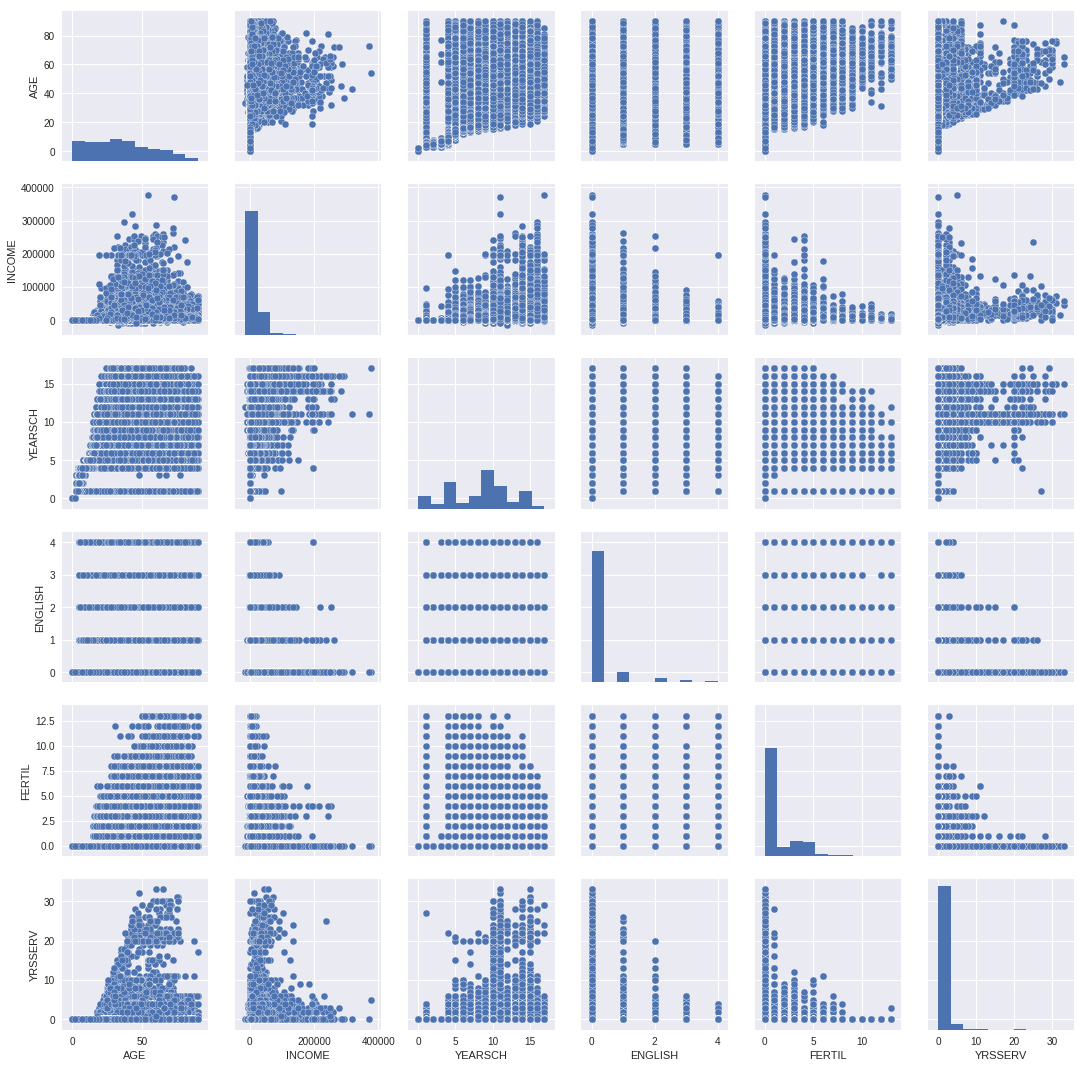

In [17]:
sns.pairplot(df_demo_2)

/home/ashish/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Number of clusters: 3
Silhouette Coefficient: 0.270


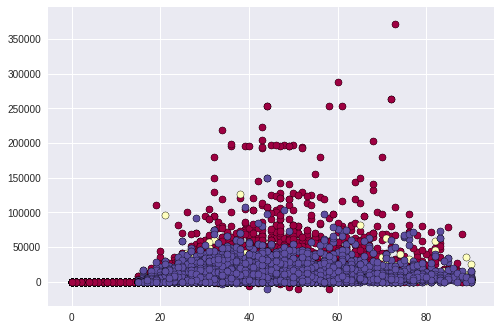

In [7]:

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 3

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')


In [8]:
max_sil_score = -1
best_labels = None
best_i = 0
clusters = range(2,11)
point_scores={}
for i in range(2,11):
    point_score=[]
    for _ in range(10):
        labels = KMeans(n_clusters = i).fit_predict(X_db)
        curr_sil_score = metrics.silhouette_score(X_db, labels)
        point_score.append(curr_sil_score)
        #if curr_sil_score > max_sil_score:
        #max_sil_score = curr_sil_score
        #best_labels = labels
        #best_i = i
    point_scores[i] = point_score
 

In [9]:
k_means_df = DataFrame.from_dict(point_scores)

In [10]:
k_means_df.head()

,2,3,4,5,6,7,8,9,10
0,0.135890,0.270637,0.304758,0.335191,0.357549,0.349213,0.389606,0.353387,0.393587
1,0.251841,0.264975,0.202629,0.329718,0.249545,0.318560,0.338319,0.394933,0.398833
2,0.135890,0.158452,0.299437,0.228935,0.225632,0.284280,0.284659,0.406304,0.394902
3,0.319711,0.264975,0.163218,0.252373,0.269182,0.331232,0.327755,0.421100,0.397162
4,0.135221,0.159554,0.197065,0.215538,0.249064,0.304828,0.343095,0.387708,0.382151


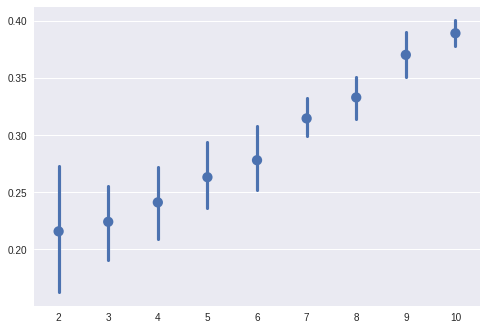

In [22]:
sns.pointplot(data=k_means_df,  join=False)
#point plot for k_means
#highest for 10

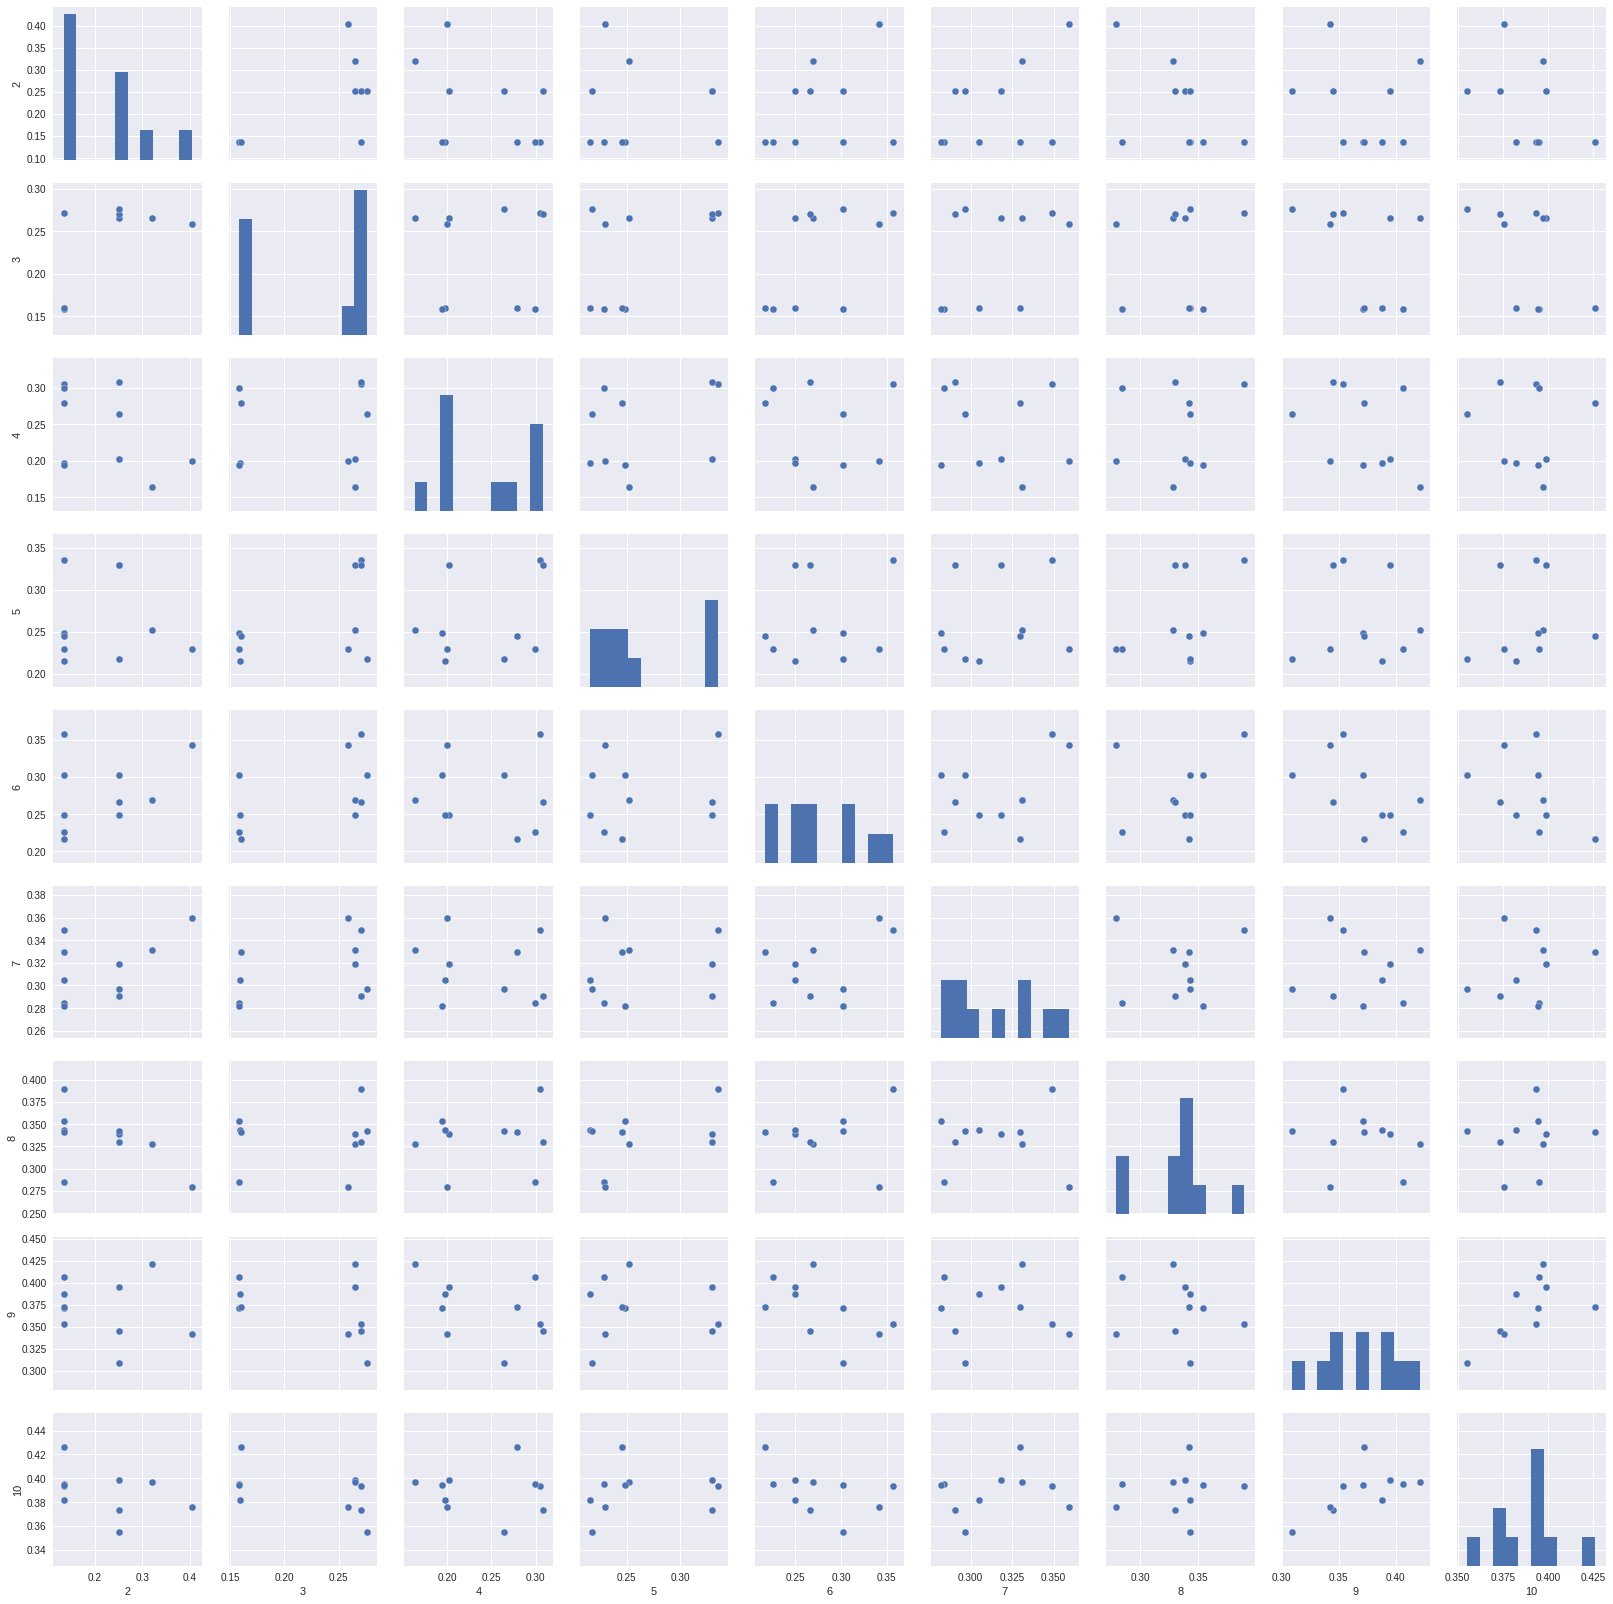

In [14]:
sns.pairplot(k_means_df)

In [12]:
max_sil_score = -1
best_labels = None
best_i = 0
ag_clusters = range(2,11)
ag_point_scores=[]
for i in range(2,11):
    point_score=[]
    for _ in range(10):
        labels = Ag(n_clusters = i).fit_predict(X_db)
        curr_sil_score = metrics.silhouette_score(X_db, labels)
        point_score.append(curr_sil_score)
        #if curr_sil_score > max_sil_score:
        #max_sil_score = curr_sil_score
        #best_labels = labels
        #best_i = i
    ag_point_scores.append(point_score)
 

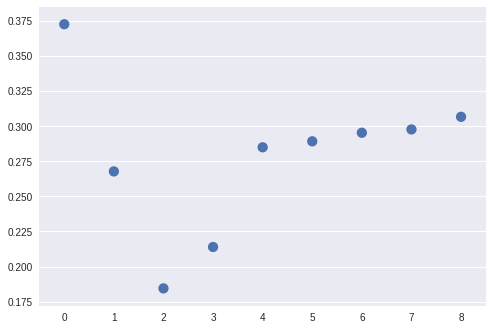

In [13]:
sns.pointplot(   data=ag_point_scores, join=False)
#highest silhouette score at 2 since running range(2,11)

In [18]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_df = pd.DataFrame(columns=['score','n-cluster'])
for i in range(2,11):
    values = []
    for j in range(10):
        n_clusters = i
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)
        agglomerative_df = agglomerative_df.append({'score':metrics.silhouette_score(X_db, labels), 'n-cluster':n_clusters}, ignore_index=True)

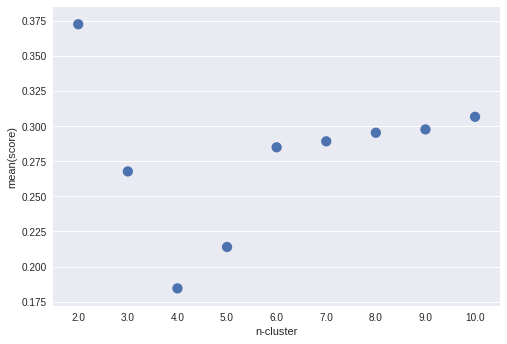

In [19]:
sns.pointplot(data=agglomerative_df, y='score', x='n-cluster', join=False)